In [1]:
# Various texture analysis tools

from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os
import time

from matplotlib import pyplot as plt
from IPython import display

In [5]:
PATH = "/Volumes/Data/projects/cs230/Project/RenderGAN/objloader/planes-sketchup/antics/"

BUFFER_SIZE = 400
BATCH_SIZE = 1
IMG_WIDTH = 512
IMG_HEIGHT = 512

In [3]:
def load(image_file):
  image = tf.io.read_file(image_file)
  image = tf.image.decode_png(image)

  image = tf.cast(image, tf.float32)

  return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]], shape=(512, 512, 3), dtype=float32)


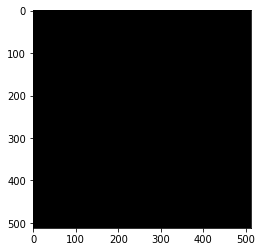

In [15]:
inp = load(PATH+'A/8.png')
oup = load(PATH+'B/8.png')
print(inp)
diff = (oup/255.0) - (inp/255.0)
# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(diff/255.0)

In [26]:
import colorgram

# Extract 6 colors from an image.
colors = colorgram.extract(PATH+'B/8.png', 100)

# colorgram.extract returns Color objects, which let you access
# RGB, HSL, and what proportion of the image was that color.
first_color = colors[0]
rgb = first_color.rgb # e.g. (255, 151, 210)
hsl = first_color.hsl # e.g. (230, 255, 203)
proportion  = first_color.proportion # e.g. 0.34

# RGB and HSL are named tuples, so values can be accessed as properties.
# These all work just as well:
red = rgb[0]
red = rgb.r
saturation = hsl[1]
saturation = hsl.s

In [40]:
print(colors[1])

<colorgram.py Color: Rgb(r=153, g=166, b=170), 0.8312225341796875%>


In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

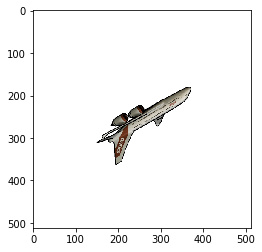

In [37]:
nemo = cv2.imread(PATH+'B/8.png')
plt.imshow(nemo)
plt.show()

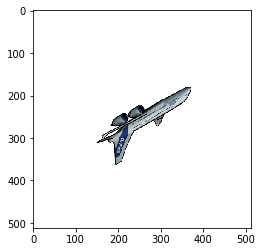

In [38]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
>>> plt.imshow(nemo)
>>> plt.show()

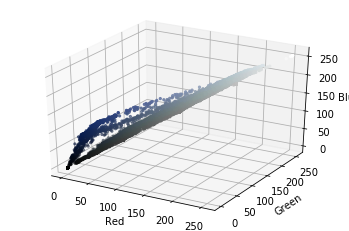

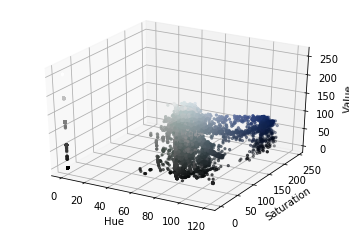

In [46]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import numpy as np

r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

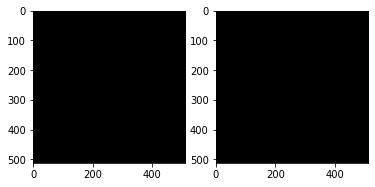

In [48]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
light_orange = (80, 200, 0)
dark_orange = (100, 250, 100)

mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
result = cv2.bitwise_and(nemo, nemo, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

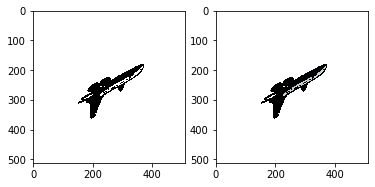

In [49]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

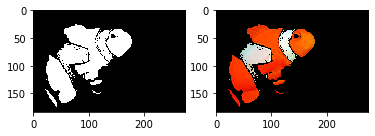

In [35]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

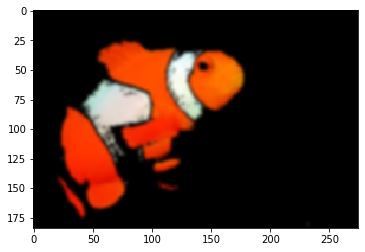

In [36]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[0.96030426 0.00928497 0.01155472 0.0071907  0.01166534]


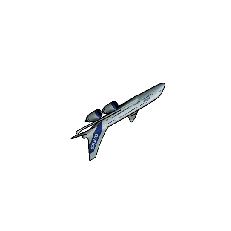

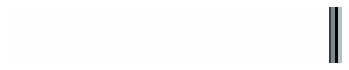

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
# import the necessary packages
import numpy as np
import cv2
import utils

def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
	# return the histogram
	return hist

def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

PATH = "/Volumes/Data/projects/cs230/Project/RenderGAN/objloader/planes-sketchup/antics/"


image = cv2.imread(PATH+'B/8.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))
print(image)

# cluster the pixel intensities
clt = KMeans(n_clusters = 5)
clt.fit(image)
print(clt)

# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
print(hist)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()